In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df1=pd.read_csv('C:\\Users\\Ekko\Downloads\\archive (7)\\tmdb_5000_credits.csv')
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
df2=pd.read_csv('C:\\Users\\Ekko\Downloads\\archive (7)\\tmdb_5000_movies.csv')
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


# Add Attribute

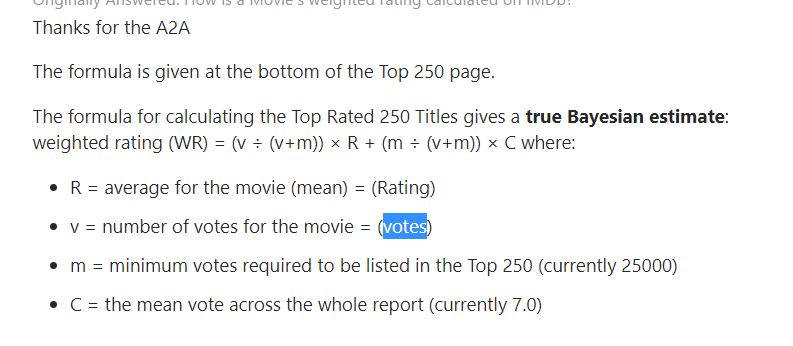

we will add score attribute according to IMBD

In [4]:
df2.vote_count.describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

In [5]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [6]:
C=df2['vote_average'].mean()
C

6.092171559442011

In [7]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [8]:
df2['score'] = df2.apply(weighted_rating, axis=1)
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,6.665696


In [9]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [10]:
df2['profits'] = df2.revenue-df2.budget
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,score,profits
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,7.050669,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,6.665696,661000000


In [11]:
df=pd.concat([df1,df2],axis=1)
df.columns

Index(['movie_id', 'title', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'id', 'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'score', 'profits'],
      dtype='object')

# Feature Engineering 

# Clean the data

In [12]:
df1.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [13]:
df2.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
score                      0
profits                    0
dtype: int64

In [14]:
df2.drop(['homepage','tagline'],axis=1,inplace=True)
df2.dropna(subset=['runtime','overview','release_date'],inplace=True)

# Data Analysis

In [15]:
df2.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,score,profits
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,7.050669,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,6.665696,661000000


## What is the most 10 movies in rate ?

<AxesSubplot:xlabel='original_title'>

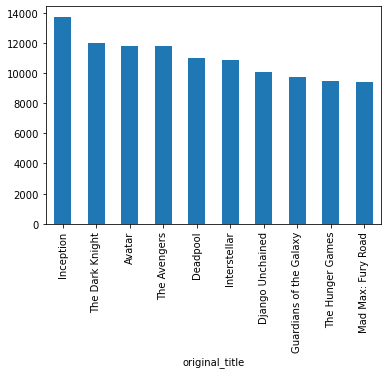

In [16]:
q1=df2.groupby(['original_title'])['vote_count'].sum().sort_values(ascending=False).head(10)
q1.plot.bar()

## What is the most 10 revenue movies?

<AxesSubplot:xlabel='original_title'>

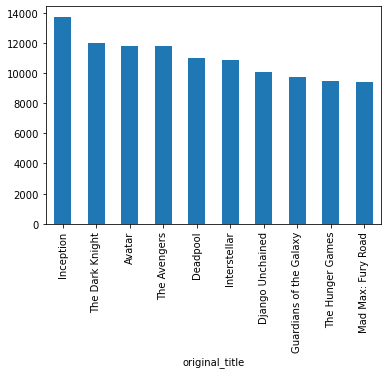

In [17]:
q1=df2.groupby(['original_title'])['vote_count'].sum().sort_values(ascending=False).head(10)
q1.plot.bar()

## What is the most 10 movies profit ? 

<AxesSubplot:ylabel='profits'>

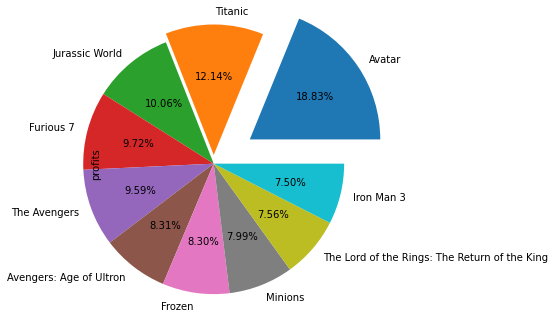

In [45]:
q1=df2.groupby(['original_title'])['profits'].sum().sort_values(ascending=False).head(10)
q1.plot.pie(radius=1.5,autopct="%0.2f%%",explode=[0.5,0.1,0,0,0,0,0,0,0,0])

In [19]:
q1

original_title
Avatar                                           2550965087
Titanic                                          1645034188
Jurassic World                                   1363528810
Furious 7                                        1316249360
The Avengers                                     1299557910
Avengers: Age of Ultron                          1125403694
Frozen                                           1124219009
Minions                                          1082730962
The Lord of the Rings: The Return of the King    1024888979
Iron Man 3                                       1015439994
Name: profits, dtype: int64

## What is the best 3 movies action ?

In [20]:
df2.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,score,profits
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,7.050669,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,6.665696,661000000


In [21]:
q=df2[df2.genres.str.contains('Action')].sort_values('score',ascending=False).head(3)['original_title']
q

65                                   The Dark Knight
96                                         Inception
329    The Lord of the Rings: The Return of the King
Name: original_title, dtype: object

## What is the best 3 movies adventure?

In [22]:
q=df2[df2.genres.str.contains('Adventure')].sort_values('score',ascending=False).head(3)['original_title']
q

96                                         Inception
95                                      Interstellar
329    The Lord of the Rings: The Return of the King
Name: original_title, dtype: object

## what are the best movies that directed by walt disney? 

In [23]:
q=df2[df2.production_companies.str.contains('Disney')].sort_values('score',ascending=False).head(10)['original_title']
q

77                                            Inside Out
494                                        The Lion King
57                                                WALL·E
88                                            Big Hero 6
199    Pirates of the Caribbean: The Curse of the Bla...
231                                       Monsters, Inc.
42                                           Toy Story 3
118                                          Ratatouille
339                                      The Incredibles
124                                               Frozen
Name: original_title, dtype: object

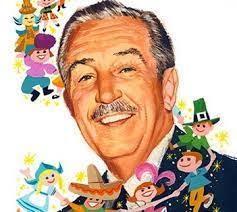

## what are the best movies by leonardo dicaprio? 

In [24]:
q=df[df.cast.str.contains('Leonardo DiCaprio')].sort_values('score',ascending=False)['original_title']
q

96                        Inception
287                Django Unchained
298         The Wolf of Wall Street
439                  Shutter Island
351                    The Departed
25                          Titanic
883             Catch Me If You Can
176                    The Revenant
49                 The Great Gatsby
297                   Blood Diamond
316               Gangs of New York
2946    What's Eating Gilbert Grape
250                     The Aviator
2661                 Romeo + Juliet
1081             Revolutionary Road
622                    Body of Lies
961                       The Beach
1380       The Man in the Iron Mask
1514         The Quick and the Dead
2004                  Marvin's Room
2870                      Celebrity
1409                       J. Edgar
Name: original_title, dtype: object

### 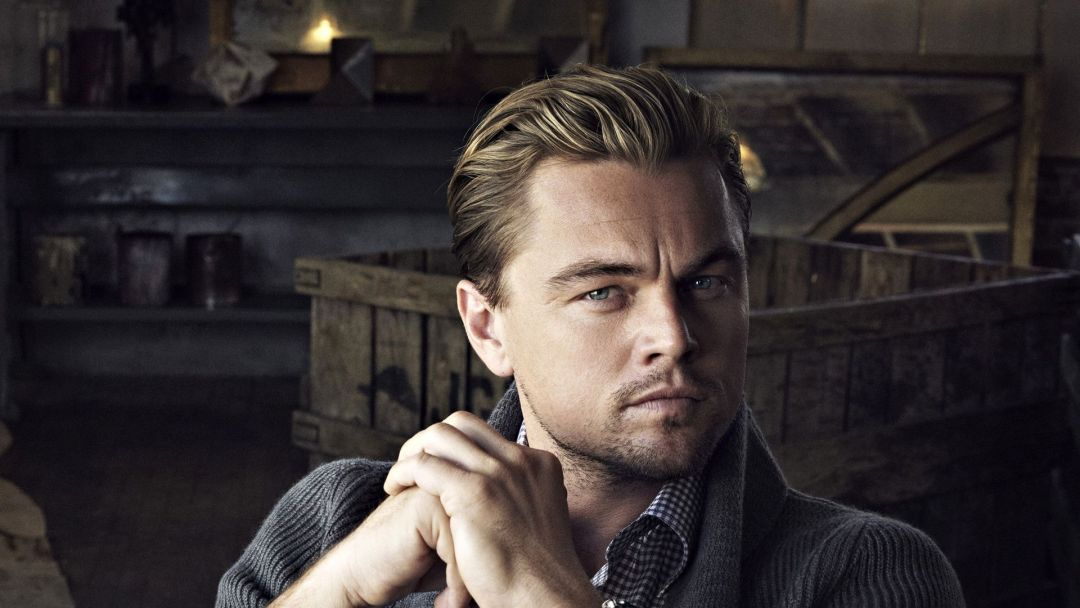

## What are the best movies for johny depp?

In [25]:
q=df[df.cast.str.contains('Johnny Depp')].sort_values('score',ascending=False)['original_title']
q

199     Pirates of the Caribbean: The Curse of the Bla...
2108                                  Edward Scissorhands
12             Pirates of the Caribbean: Dead Man's Chest
1                Pirates of the Caribbean: At World's End
1594                                         Corpse Bride
3445                                              Platoon
1581                                                 Blow
1394                                        Donnie Brasco
2946                          What's Eating Gilbert Grape
2310                       Fear and Loathing in Las Vegas
1842                                    Finding Neverland
1378                            A Nightmare on Elm Street
1119                                       21 Jump Street
117                     Charlie and the Chocolate Factory
2368                                              Ed Wood
178                                                 Rango
1832                                             Chocolat
17            

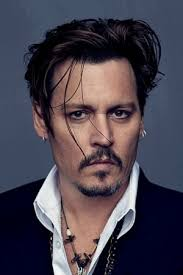

In [26]:
dd=[]
def extract_star(x):
    try:
        dd.append(x.split('"name": "')[1].split(',')[0])
        return x.split('"name": "')[1].split(',')[0][:-1]
    except:
        return ''

In [27]:
df['star']=df.cast.apply(lambda x: extract_star(x))

In [28]:
df.columns

Index(['movie_id', 'title', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'id', 'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'score', 'profits',
       'star'],
      dtype='object')

## What is the most actor got high revenue form his movies ?

In [29]:
q=df.groupby('star')['revenue'].sum().sort_values(ascending=False).head(10)
q

star
Tom Cruise           7570390285
Tom Hanks            7330446178
Robert Downey Jr.    6469496153
Johnny Depp          6319730820
Will Smith           5859431885
Daniel Radcliffe     5538792293
Ben Stiller          5232397222
Bruce Willis         4875181368
Leonardo DiCaprio    4069408116
Christian Bale       3916471019
Name: revenue, dtype: int64

<AxesSubplot:ylabel='revenue'>

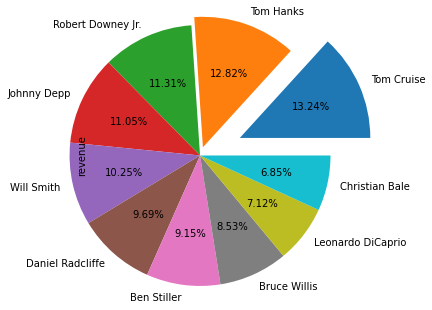

In [44]:
q.plot.pie(radius=1.5,autopct="%0.2f%%",explode=[0.5,0.1,0,0,0,0,0,0,0,0])

In [46]:
df.head(2)

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,score,profits,star
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,7.050669,2550965087,Sam Worthington
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,6.665696,661000000,Johnny Depp


In [47]:
df.columns

Index(['movie_id', 'title', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'id', 'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'score', 'profits',
       'star'],
      dtype='object')

## What is the worest 10 movies ?  

In [52]:
q=df.groupby('original_title')['score'].sum().sort_values(ascending=True).head(10)
q

original_title
Fantastic Four                  5.155730
Batman & Robin                  5.268225
The Boy Next Door               5.380383
Independence Day: Resurgence    5.406234
Dragonball Evolution            5.451073
After Earth                     5.459420
A Good Day to Die Hard          5.507643
Catwoman                        5.514453
Green Lantern                   5.521697
Fifty Shades of Grey            5.522082
Name: score, dtype: float64

## What is the best movies in 2010?

In [59]:
df.release_date.describe()

count           4802
unique          3280
top       2006-01-01
freq              10
Name: release_date, dtype: object

In [78]:
df.release_date=pd.to_datetime(df.release_date)
df.release_date=df.release_date.dt.year
df.release_date.describe()

count    4802.000000
mean     2002.468763
std        12.414354
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2017.000000
Name: release_date, dtype: float64

In [91]:
q=df[df.release_date==2010]
q=q.groupby('original_title')['score'].sum().sort_values(ascending=False).head(10)
q

original_title
Inception                   7.863239
Shutter Island              7.415914
Toy Story 3                 7.169259
How to Train Your Dragon    7.073292
The King's Speech           6.996133
Black Swan                  6.945767
Tangled                     6.934805
Despicable Me               6.877212
Kick-Ass                    6.814225
The Social Network          6.745697
Name: score, dtype: float64

<AxesSubplot:ylabel='score'>

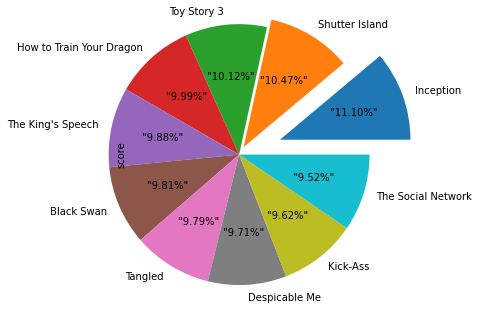

In [92]:
q.plot.pie(radius=1.5,autopct='"%0.2f%%"',explode=[0.5,0.1,0,0,0,0,0,0,0,0])

## What is year that has the best movies ? 

In [160]:
q=df[df.score>=7.0]
ans=q.groupby(['release_date'])['release_date'].count().sort_values(ascending=False).head(5)
ans

release_date
2014.0    16
2015.0     9
2013.0     9
2004.0     7
2001.0     7
Name: release_date, dtype: int64

##### 2014 has the best movies  

## What are the most 10 movies that have budget less than revenues ?

In [177]:
q=df[df.profits<=0]
ans=q.groupby('original_title')['profits'].sum().sort_values(ascending=True).head(10)
ans

original_title
The Lone Ranger                -165710090
The Wolfman                    -150000000
The Alamo                      -119180039
Mars Needs Moms                -111007242
Dragonball Evolution           -100000000
The 13th Warrior                -98301101
The Adventures of Pluto Nash    -92896027
Metropolis                      -91969578
Volcano                         -90000000
Mighty Joe Young                -90000000
Name: profits, dtype: int64